In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F897%2F1638%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240901%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240901T080318Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D72b35b8dfe213048682b8f18b0d68a4a7407d01be4bf6ac0e562caee06ef31794b9286f2bd309f26e9f27a8e4073f3cd3206a86d75c908dc7a8f3ad9eb35e8fb01c6a2009898f5aac41528a45ce6b33c0ad8c21ef95dbe3ec057f23df4dbdc8fad5bc8eb8970ae670ed52b981eccb5c4ac6c27214dd20899bd0adc520f91aa2a6a7bcd68bc5c1ab6972c0440d8200484f7f0bfd3073f4f38f088540c5b78a575fb3746c7c29f8f3014e1d00779bdfea4ad4210039879905bcb6fe64b7ecfa0d6f294ecf2f37da5e70c07418689f3ca02e0b05068e95f7581a58117aa7101bc96c23b7816f7c946e6c5bc8e5506072610e0e0520a74302d1b0d19c10f80c16a3d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

print(check_output(["ls", "../input"]).decode("utf8"))

Sheet_1.csv
Sheet_2.csv



/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [ ]:
chatbot = pd.read_csv("../input/Sheet_1.csv",usecols=['response_id','class','response_text'],encoding='latin-1')
resume = pd.read_csv("../input/Sheet_2.csv",encoding='latin-1')

****Sheet_1.csv contains 80 user responses, in the response_text column, to a therapy chatbot. Bot said: 'Describe a time when you have acted as a resource for someone else'.  User responded. If a response is 'not flagged', the user can continue talking to the bot. If it is 'flagged', the user is referred to help. ****

In [ ]:
chatbot.head(5)

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [ ]:
chatbot['class'].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

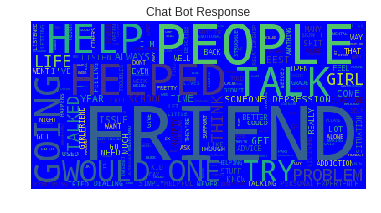

In [ ]:
def cloud(text):
    wordcloud = WordCloud(background_color="blue",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Chat Bot Response")
cloud(chatbot['response_text'])

**Model Building **

In [ ]:
chatbot['Label'] = Encode.fit_transform(chatbot['class'])

In [ ]:
chatbot['Label'].value_counts()
#not_flagged    55
#flagged        25

1    55
0    25
Name: Label, dtype: int64

**Naive Bayes**

In [ ]:
x = chatbot.response_text
y = chatbot.Label
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)






0.69999999999999996

**Random Forest**

In [ ]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

0.80000000000000004

In [ ]:
Chatbot_Text = chatbot["response_text"]
len(Chatbot_Text)

80

In [ ]:
Tf_idf = CountVectorizer(max_features=256).fit_transform(Chatbot_Text.values)

In [ ]:
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=200,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf.toarray())




[t-SNE] Computing pairwise distances...
[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 2.118454
[t-SNE] Iteration 25: error = -0.4503966, gradient norm = 0.0007019
[t-SNE] Iteration 25: gradient norm 0.000702. Finished.
[t-SNE] Iteration 50: error = -0.7398843, gradient norm = 0.0004044
[t-SNE] Iteration 50: gradient norm 0.000404. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: -0.739884
[t-SNE] Iteration 75: error = -0.8899551, gradient norm = 0.0003041
[t-SNE] Iteration 75: gradient norm 0.000304. Finished.
[t-SNE] Error after 75 iterations: -0.889955


In [ ]:
trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = Chatbot_Text.values,
        colorscale = 'Portland',
        colorbar = dict(title = 'TExt'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='test')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')


**Kindly Up vote if you like**